### CREDIT CARD FRAUD DETECTION

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
!pip install opendatasets


**Reading datasets**

In [ ]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/kartik2112/fraud-detection")

100%|██████████| 202M/202M [00:02<00:00, 77.9MB/s]


In [ ]:
traindata = pd.read_csv('fraud-detection/fraudTrain.csv')
testdata = pd.read_csv('fraud-detection/fraudTest.csv')

In [ ]:
traindata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


In [ ]:
testdata.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


In [ ]:
df = pd.concat([traindata, testdata], axis = 0)
df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0
3,3,2019-01-01 00:01:16,3534093764340240,"fraud_Kutch, Hermiston and Farrell",gas_transport,45.00,Jeremy,White,M,9443 Cynthia Court Apt. 038,...,46.2306,-112.1138,1939,Patent attorney,1967-01-12,6b849c168bdad6f867558c3793159a81,1325376076,47.034331,-112.561071,0
4,4,2019-01-01 00:03:06,375534208663984,fraud_Keeling-Crist,misc_pos,41.96,Tyler,Garcia,M,408 Bradley Rest,...,38.4207,-79.4629,99,Dance movement psychotherapist,1986-03-28,a41d7549acf90789359a9aa5346dcb46,1325376186,38.674999,-78.632459,0


**Data cleaning**

In [ ]:
df.describe()

,Unnamed: 0,cc_num,amt,zip,lat,long,city_pop,unix_time,merch_lat,merch_long,is_fraud
count,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06,1.852394e+06
mean,5.371934e+05,4.173860e+17,7.006357e+01,4.881326e+04,3.853931e+01,-9.022783e+01,8.864367e+04,1.358674e+09,3.853898e+01,-9.022794e+01,5.210015e-03
std,3.669110e+05,1.309115e+18,1.592540e+02,2.688185e+04,5.071470e+00,1.374789e+01,3.014876e+05,1.819508e+07,5.105604e+00,1.375969e+01,7.199217e-02
min,0.000000e+00,6.041621e+10,1.000000e+00,1.257000e+03,2.002710e+01,-1.656723e+02,2.300000e+01,1.325376e+09,1.902742e+01,-1.666716e+02,0.000000e+00
25%,2.315490e+05,1.800429e+14,9.640000e+00,2.623700e+04,3.466890e+01,-9.679800e+01,7.410000e+02,1.343017e+09,3.474012e+01,-9.689944e+01,0.000000e+00
50%,4.630980e+05,3.521417e+15,4.745000e+01,4.817400e+04,3.935430e+01,-8.747690e+01,2.443000e+03,1.357089e+09,3.936890e+01,-8.744069e+01,0.000000e+00
75%,8.335758e+05,4.642255e+15,8.310000e+01,7.204200e+04,4.194040e+01,-8.015800e+01,2.032800e+04,1.374581e+09,4.195626e+01,-8.024511e+01,0.000000e+00
max,1.296674e+06,4.992346e+18,2.894890e+04,9.992100e+04,6.669330e+01,-6.795030e+01,2.906700e+06,1.388534e+09,6.751027e+01,-6.695090e+01,1.000000e+00


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1852394 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Unnamed: 0             int64  
 1   trans_date_trans_time  object 
 2   cc_num                 int64  
 3   merchant               object 
 4   category               object 
 5   amt                    float64
 6   first                  object 
 7   last                   object 
 8   gender                 object 
 9   street                 object 
 10  city                   object 
 11  state                  object 
 12  zip                    int64  
 13  lat                    float64
 14  long                   float64
 15  city_pop               int64  
 16  job                    object 
 17  dob                    object 
 18  trans_num              object 
 19  unix_time              int64  
 20  merch_lat              float64
 21  merch_long             float64
 22  is_fraud           

In [ ]:
df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

In [ ]:
df = df.drop(['Unnamed: 0'], axis = 1)

**Data Visualization**

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: xlabel='is_fraud', ylabel='count'>

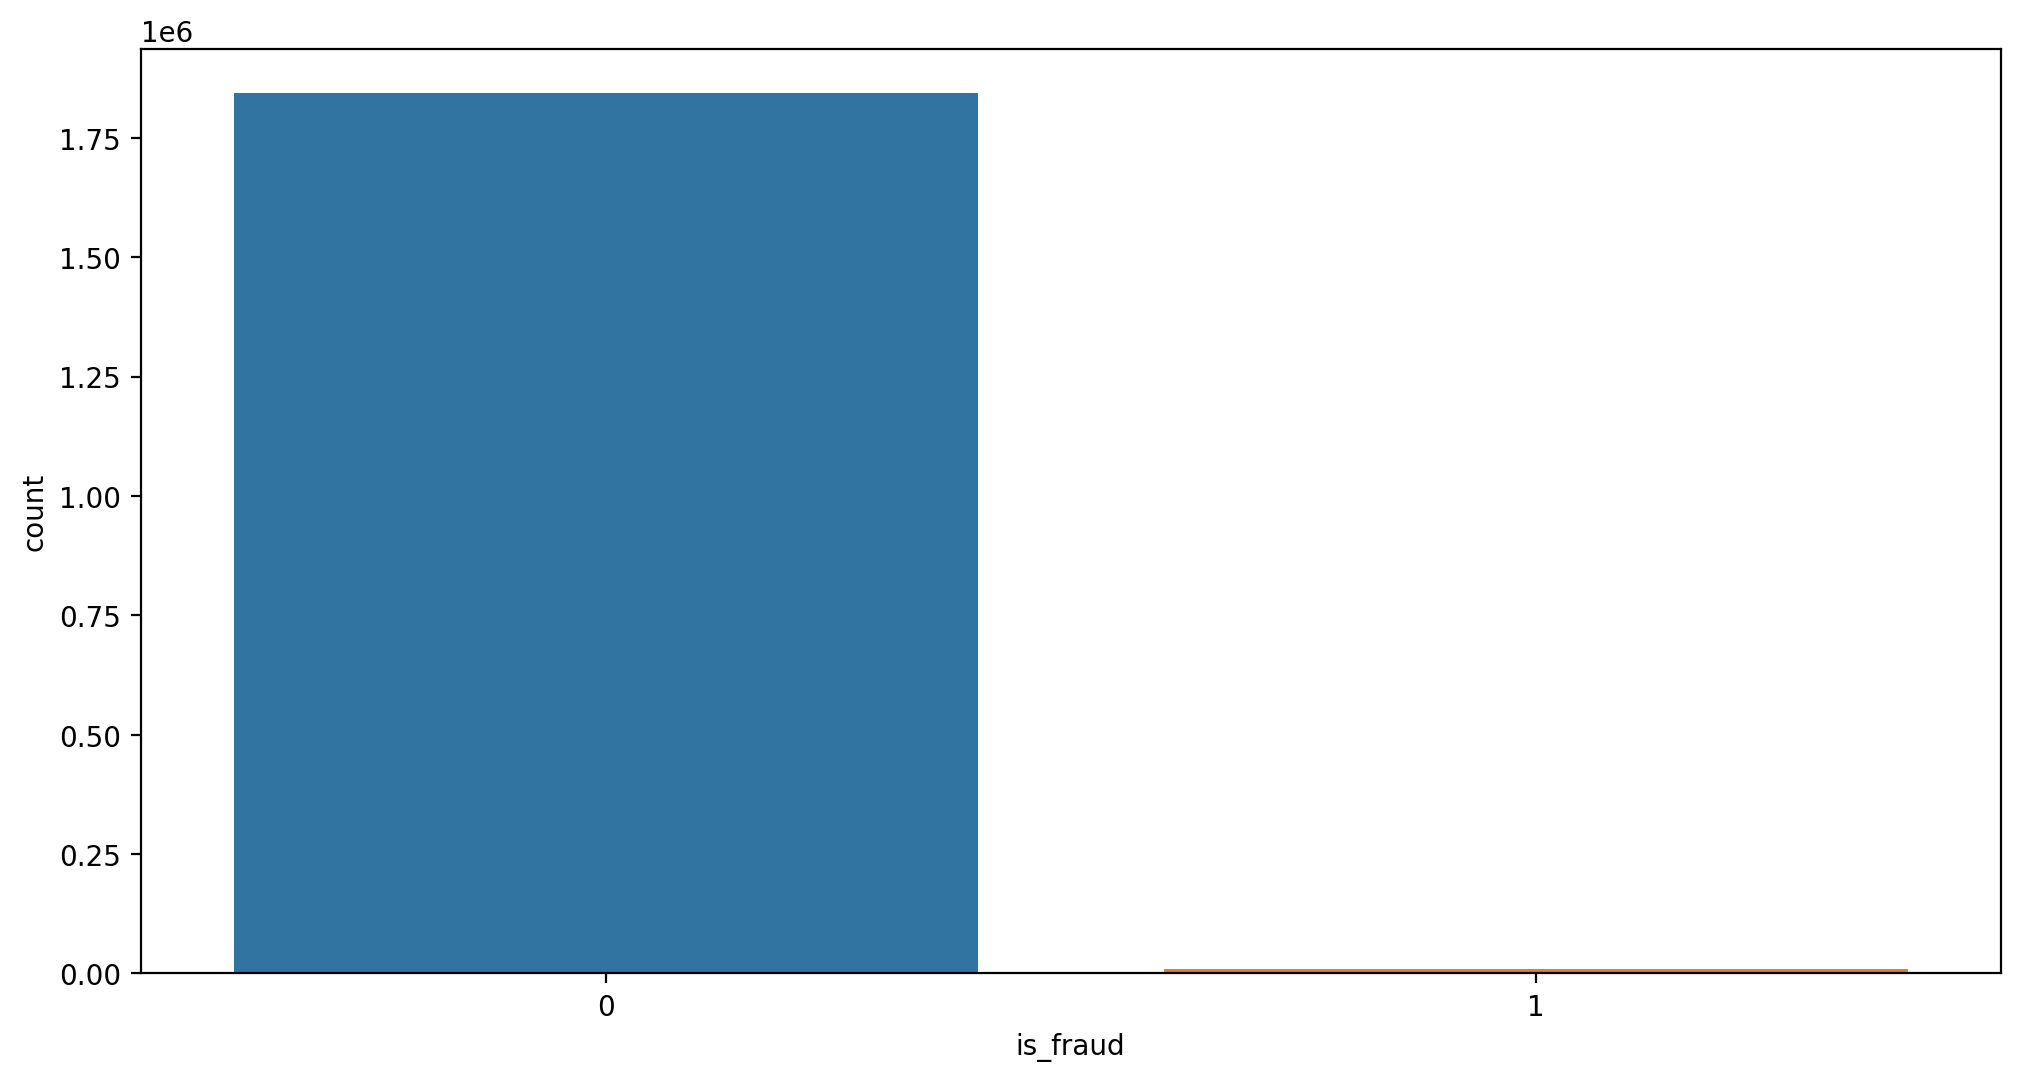

In [ ]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = df['is_fraud'])

<Axes: xlabel='gender', ylabel='count'>

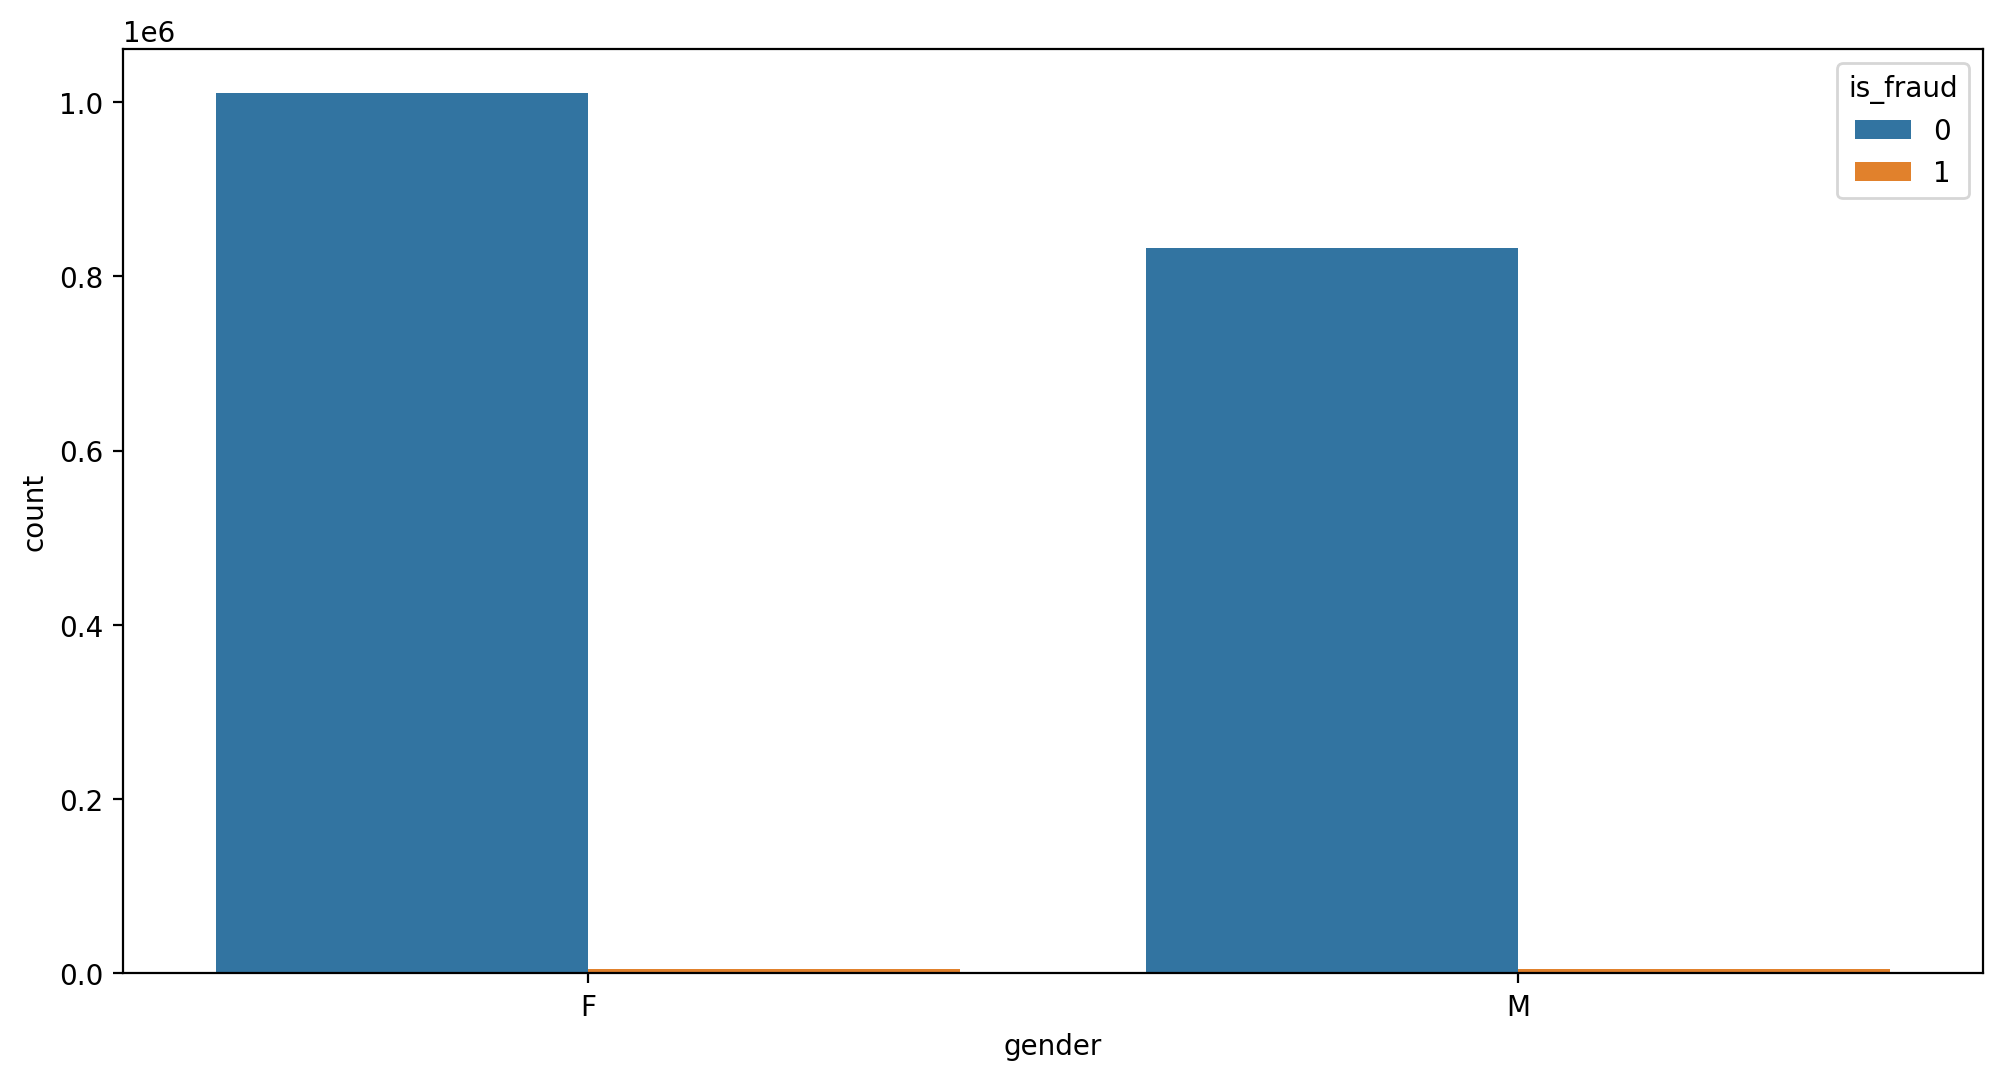

In [ ]:
plt.figure(figsize = (12,6), dpi = 200)
sns.countplot(x = 'gender', hue = 'is_fraud', data = df)

**Dependent and independent features dataset**

In [ ]:
x = df.drop(['is_fraud'], axis = 1)
y = df['is_fraud']

**Finding categorical columns**

In [ ]:
categorical_columns = (df.dtypes == 'object')

In [ ]:
object_cols = list(categorical_columns[categorical_columns].index)

In [ ]:
object_cols

['trans_date_trans_time',
 'merchant',
 'category',
 'first',
 'last',
 'gender',
 'street',
 'city',
 'state',
 'job',
 'dob',
 'trans_num']

In [ ]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import MinMaxScaler

**Encoding**

In [ ]:
cols = ['trans_date_trans_time', 'merchant', 'category', 'first', 'last',
        'gender', 'street', 'city', 'state', 'job', 'dob', 'trans_num']
encoder = OrdinalEncoder()
x[cols] = encoder.fit_transform(x[cols])

**MinMax Scaling**

In [ ]:
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [ ]:
y = df[['is_fraud']].values

In [ ]:
print('Independent Features Shape : ' , x.shape)
print('Dependent Features Shape   : ',y.shape)

Independent Features Shape :  (1852394, 21)
Dependent Features Shape   :  (1852394, 1)


In [ ]:
df['is_fraud'].value_counts()

0    1842743
1       9651
Name: is_fraud, dtype: int64

**Under Sampling**

In [ ]:
from imblearn.under_sampling import NearMiss

In [ ]:
from imblearn.under_sampling import NearMiss
sampler = NearMiss()
x_sample, y_sample = sampler.fit_resample(x, y)

print('Data   : ', x_sample.shape)
print('Labels : ', y_sample.shape)

Data   :  (19302, 21)
Labels :  (19302,)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE



**Datasets into training and testing**

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 2)

In [ ]:
print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (15441, 21)
Training Labels Shape :  (15441,)
Testing Data Shape    :  (3861, 21)
Testing Labels Shape  :  (3861,)


**Logistic Regression**

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

LogisticRegression()

In [ ]:
pred_train = lr_classifier.predict(x_train)
pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.804157761802992
Testing  Accuracy :  0.8067858067858068


In [ ]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.7937806873977087
Testing  Set f1 score :  0.8017012227538544

Test set precision :  0.8429290106204583
Test set recall    :  0.76431829700963


**Decision Tree Classification**

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_train = dt_classifier.predict(x_train)
pred_test  = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  1.0
Testing  Accuracy :  0.9513079513079513


In [ ]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))
print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  1.0
Testing  Set f1 score :  0.9523084728564181

Test set precision :  0.9532757745048248
Test set recall    :  0.9513431322858591


**Random Forest Classification**

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators = 100, max_depth = 12, random_state = 2)
rf_classifier.fit(x_train, y_train)

RandomForestClassifier(max_depth=12, random_state=2)

In [ ]:
pred_train = rf_classifier.predict(x_train)
pred_test  = rf_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9627614791788096
Testing Set Accuracy  :  0.9334369334369335


**XG Boost Classification**

In [ ]:
xg_classifier = XGBClassifier(n_estimators = 50)
xg_classifier.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=50, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)

In [ ]:
pred_train = xg_classifier.predict(x_train)
pred_test  = xg_classifier.predict(x_test)

print('Training Set Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing Set Accuracy  : ', accuracy_score(y_test, pred_test))

Training Set Accuracy :  0.9937827860889838
Testing Set Accuracy  :  0.9696969696969697


In [ ]:
print('Training Set f1 score : ', f1_score(y_train, pred_train))
print('Testing  Set f1 score : ', f1_score(y_test, pred_test))

print()
print('Test set precision : ', precision_score(y_test, pred_test))
print('Test set recall    : ', recall_score(y_test, pred_test))

Training Set f1 score :  0.9937629937629937
Testing  Set f1 score :  0.970402226157349

Test set precision :  0.9686868686868687
Test set recall    :  0.9721236695387735


**Oversampling**

In [ ]:
smote_sample = SMOTE()
x_sample, y_sample = smote_sample.fit_resample(x, y)

print('Data   : ', x_sample.shape)
print('Labels : ', y_sample.shape)

Data   :  (3685486, 21)
Labels :  (3685486,)


In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x_sample, y_sample, test_size = 0.2, random_state = 2)

print('Training Data Shape   : ', x_train.shape)
print('Training Labels Shape : ', y_train.shape)
print('Testing Data Shape    : ', x_test.shape)
print('Testing Labels Shape  : ', y_test.shape)

Training Data Shape   :  (2948388, 21)
Training Labels Shape :  (2948388,)
Testing Data Shape    :  (737098, 21)
Testing Labels Shape  :  (737098,)


**Logistic Regression**

In [ ]:
lr_classifier = LogisticRegression()
lr_classifier.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_train = lr_classifier.predict(x_train)
pred_test  = lr_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.8753145786782472
Testing  Accuracy :  0.8760626131125033


**Decision Tree Classification**

In [ ]:
dt_classifier = DecisionTreeClassifier(max_depth = 50, random_state = 100)
dt_classifier.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=50, random_state=100)

In [ ]:
pred_train = dt_classifier.predict(x_train)
pred_test  = dt_classifier.predict(x_test)

print('Training Accuracy : ', accuracy_score(y_train, pred_train))
print('Testing  Accuracy : ', accuracy_score(y_test, pred_test))

Training Accuracy :  0.9999284354705011
Testing  Accuracy :  0.998058602790945
